In [1]:
from fit_util import *
from omega_a_fitting import *
from pileup_correction import *
from lost_muon_calculation import *

Welcome to JupyROOT 6.12/06


In [2]:
#f = r.TFile("../truncationTest/data/results_1MissingFile_FullVsTrunc.root")
f = r.TFile("../truncationTest/data/results_pileupBinning6_9day.root")
f.ls()

TFile**		../truncationTest/data/results_pileupBinning6_9day.root	
 TFile*		../truncationTest/data/results_pileupBinning6_9day.root	
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clusterCompare;1	clusterCompare (ReconComparisonTruncatedVsFull) folder


In [3]:
clusters = f.Get("clustersAndCoincidences").Get("clusters").Clone()
clusters.Rebin3D(6,1,1)
print(clusters)

<ROOT.TH3I object ("clusters") at 0x7fffce393220>


In [4]:
print("Binning:", clusters.GetNbinsX(),clusters.GetNbinsY(),clusters.GetNbinsZ())

Binning: 4692 300 24


In [5]:
e1 = 1700
e2 = 3100
calo = 0

wiggle = MakeWiggleFromTH3(clusters, e1, e2, calo)
#wiggle = MakeWiggleFromTH2(clusters, e1, e2, calo, 1, True)
#wiggle = MakeWiggleFromTH1(clusters, e1, e2, calo, 1, True)

In [6]:
DumpClass(wiggle)

Dumping:  <omega_a_fitting.MakeWiggleFromTH3 object at 0x7f23b5c134a8>
Class:  <class 'omega_a_fitting.MakeWiggleFromTH3'>
    elow = 1700
    ehigh = 3100
    timeScaleFactor = 1
    caloNum = 0
    isPileupCorrected = False
    BinOrEnergy = energy
    title = Wiggle Plot for [1700 < E (MeV) < 3100] in Calo 0
    h = <ROOT.TH1D object ("wiggle_1700_3100_0") at 0x7fffce409150>


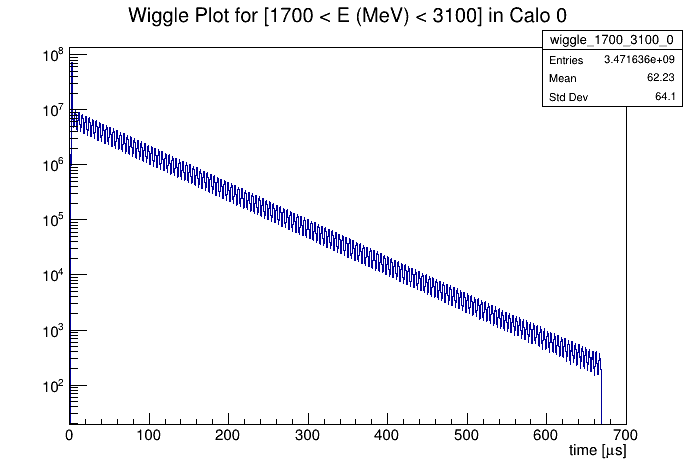

In [7]:
c = r.TCanvas()
wiggle.h.Draw()
c.SetLogy()
c.Draw()

---

### Now fit the wiggle plot

In [8]:
fitFunc = WiggleFit(GetBlindingPhrase("./blinding.txt"), "5par")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [9]:
DumpClass(fitFunc)

Dumping:  <omega_a_fitting.WiggleFit object at 0x7f23b5c426d8>
Class:  <class 'omega_a_fitting.WiggleFit'>
    getBlinded = <BlindersPy3.Blinders object at 0x7f23b5c426a0>
    KlossHist = None
    funcDict = {'5par': <bound method WiggleFit.five_parameter of <omega_a_fitting.WiggleFit object at 0x7f23b5c426d8>>, '13par': <bound method WiggleFit.blinded_wiggle_cbo of <omega_a_fitting.WiggleFit object at 0x7f23b5c426d8>>, '13par_changing': <bound method WiggleFit.blinded_wiggle_changing_cbo of <omega_a_fitting.WiggleFit object at 0x7f23b5c426d8>>, '17par': <bound method WiggleFit.blinded_wiggle_cbo_vw of <omega_a_fitting.WiggleFit object at 0x7f23b5c426d8>>, '18par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss of <omega_a_fitting.WiggleFit object at 0x7f23b5c426d8>>, '23par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss_changingCBO of <omega_a_fitting.WiggleFit object at 0x7f23b5c426d8>>, 'custom': <bound method WiggleFit.defineCustomFunction of <omega_a_fitting.WiggleFit 

In [10]:
fitFunc([0],[2+x for x in range(18)])

-5.681362293202928

In [11]:
fit = BuildTF1(fitFunc, 5, "5par", "five_parameter_fit", 30, 650)
fit.SetParameters([7000000,64.4,0.33,-33,0])
fit.SetParNames()

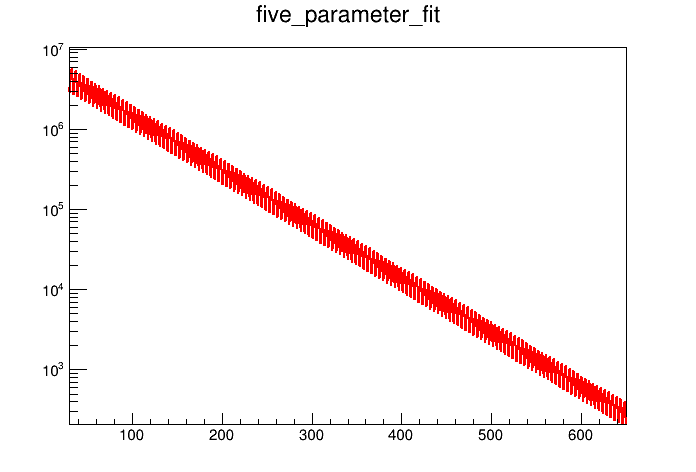

In [12]:
c = r.TCanvas()
fit.f.Draw()
c.SetLogy()
c.Draw()

In [13]:
fitter = WiggleFitter(wiggle.h, fit, "5par", "REMB", 2)

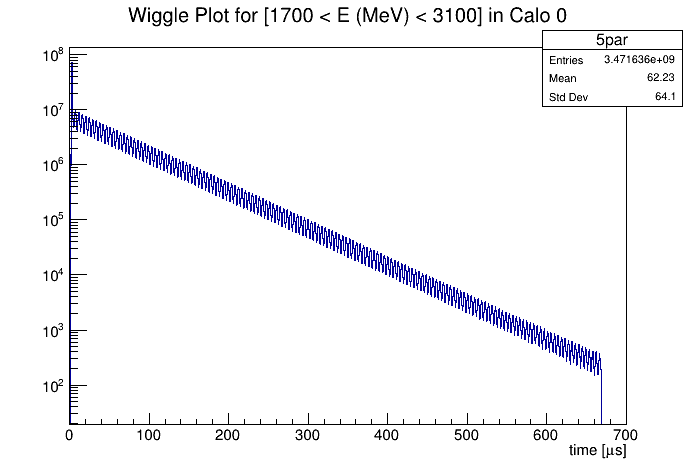

In [14]:
c = r.TCanvas()
#fitter.f.Draw()
fitter.h.Draw("")
c.SetLogy()
c.Draw()

In [15]:
fitter.Fit(2)

Starting fit 1 / 2
Parameters from this fit: 
     ChiSq/NDF =  13280.931835644053 / 4151 = 3.199453586038076
      N  =  7745044.418321746 +/- 301.6285058304414
      #tau_{#mu}  =  64.42270920744403 +/- 0.001413377923140185
      A  =  0.3702923435829322 +/- 2.9185642192993742e-05
      R  =  -47.07924780364351 +/- 0.8822342961773423
      #phi_{a}  =  -1.0607928706361762 +/- 0.00014483750878399186
Starting fit 2 / 2
Parameters from this fit: 
     ChiSq/NDF =  13280.931835643662 / 4151 = 3.199453586037982
      N  =  7745044.41862567 +/- 301.6285324245629
      #tau_{#mu}  =  64.4227092002779 +/- 0.0014133780576985296
      A  =  0.3702923435707576 +/- 2.9185642717105736e-05
      R  =  -47.07924979949969 +/- 0.8822342585162012
      #phi_{a}  =  -1.0607928707590824 +/- 0.00014483751931844286
 FCN=13280.9 FROM MINOS     STATUS=SUCCESSFUL     53 CALLS         394 TOTAL
                     EDM=4.94788e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                     

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


In [16]:
fitter.ComputeFFT()

In [17]:
DumpClass(fitter)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f23b7533ef0>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("5par") at 0x7fffce8748f0>
    f = <ROOT.TF1 object ("5par_fitter") at 0x7fffce998370>
    name = 5par_fitter
    nPar = 5
    fitOptions = REMB
    nFit = 2
    fitLow = 30
    fitHigh = 650
    intermediateParameters = [[7745044.418321746, 64.42270920744403, 0.3702923435829322, -47.07924780364351, -1.0607928706361762], [7745044.41862567, 64.4227092002779, 0.3702923435707576, -47.07924979949969, -1.0607928707590824]]
    intermediateErrors = [[301.6285058304414, 0.001413377923140185, 2.9185642192993742e-05, 0.8822342961773423, 0.00014483750878399186], [301.6285324245629, 0.0014133780576985296, 2.9185642717105736e-05, 0.8822342585162012, 0.00014483751931844286]]
    intermediateChi2 = [3.199453586038076, 3.199453586037982]
    pt = <ROOT.TPaveText object ("TPave") at 0x7fffce9e1a40>
    resid = <ROOT.TH1D object ("h_resid_5par_fitter") at 0x7fffceb

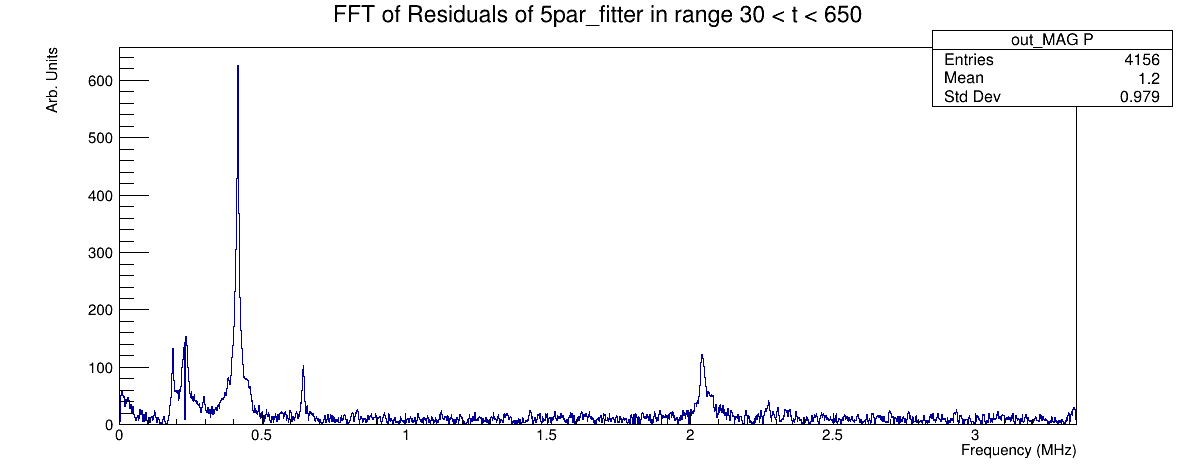

In [18]:
c = r.TCanvas("c","c",1200,500)
fitter.fft.Draw("hist")
#c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


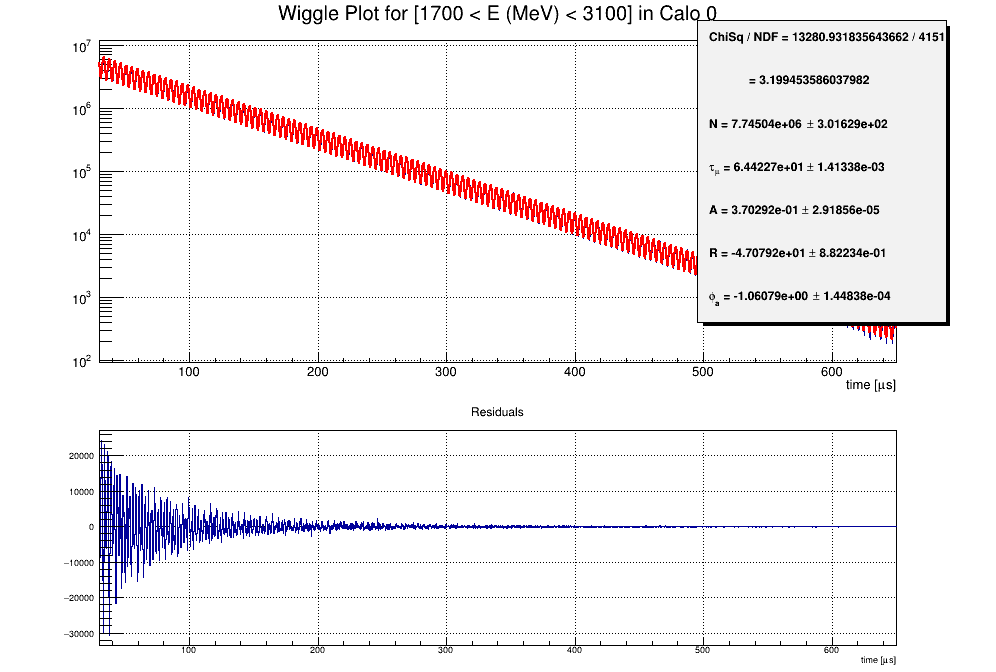

In [19]:
c = fitter.Draw()

---

### Now onto the 13-parameter fit, importing parameters as we go

In [20]:
fitFunc13 = WiggleFit(GetBlindingPhrase("./blinding.txt"), "13par")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [21]:
DumpClass(fitFunc13)

Dumping:  <omega_a_fitting.WiggleFit object at 0x7f23b4123940>
Class:  <class 'omega_a_fitting.WiggleFit'>
    getBlinded = <BlindersPy3.Blinders object at 0x7f23b4123908>
    KlossHist = None
    funcDict = {'5par': <bound method WiggleFit.five_parameter of <omega_a_fitting.WiggleFit object at 0x7f23b4123940>>, '13par': <bound method WiggleFit.blinded_wiggle_cbo of <omega_a_fitting.WiggleFit object at 0x7f23b4123940>>, '13par_changing': <bound method WiggleFit.blinded_wiggle_changing_cbo of <omega_a_fitting.WiggleFit object at 0x7f23b4123940>>, '17par': <bound method WiggleFit.blinded_wiggle_cbo_vw of <omega_a_fitting.WiggleFit object at 0x7f23b4123940>>, '18par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss of <omega_a_fitting.WiggleFit object at 0x7f23b4123940>>, '23par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss_changingCBO of <omega_a_fitting.WiggleFit object at 0x7f23b4123940>>, 'custom': <bound method WiggleFit.defineCustomFunction of <omega_a_fitting.WiggleFit 

In [22]:
fit13 = BuildTF1(fitFunc13, 13, "13par", "thirteen_parameter_fit", 30, 650)
fit13.SetParameters([100000.0, 64.32689658986958, -0.41149191856871803, -11.31981267111425, 
                     -4.201648334505292, -0.666502391530784, 0.6927259503578, -0.38908021438317, 
                     200.0, 2.5, 0.4745581246420292, 6.299934663288357, 0.28579778778899545])
fit13.ImportParameters(fitter.f)
fit13.SetParNames()

In [23]:
DumpClass(fit13)

Dumping:  <omega_a_fitting.BuildTF1 object at 0x7f23b41176d8>
Class:  <class 'omega_a_fitting.BuildTF1'>
    f = <ROOT.TF1 object ("thirteen_parameter_fit") at 0x7fffcedf3f40>
    nPar = 13
    name = thirteen_parameter_fit
    fitLow = 30
    fitHigh = 650
    funcRaw = <omega_a_fitting.WiggleFit object at 0x7f23b4123940>
    kind = 13par
    nameDict = {'5par': ['N', '#tau_{#mu}', 'A', 'R', '#phi_{a}'], '13par': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}'], '13par_changing': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}', '#delta#omega_{CBO}', 'A_{CBO}', '#tau_{CBO - A}', 'B_{CBO}', '#tau_{CBO - B}'], '17par': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}', 'A_{VW}', '#tau_{VW}', '#omega_{VW}', '#phi_

In [24]:
fitter13 = WiggleFitter(wiggle.h, fit13, "13par", "REMB", 2)

In [25]:
DumpClass(fitter13)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f23b4117550>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("13par") at 0x7fffcedb23f0>
    f = <ROOT.TF1 object ("13par_fitter") at 0x7fffcec5f780>
    name = 13par_fitter
    nPar = 13
    fitOptions = REMB
    nFit = 2
    fitLow = 30
    fitHigh = 650
    intermediateParameters = []
    intermediateErrors = []
    intermediateChi2 = []
    pt = <ROOT.TPaveText object ("TPave") at 0x7fffcedae390>
    resid = None
    fft = None


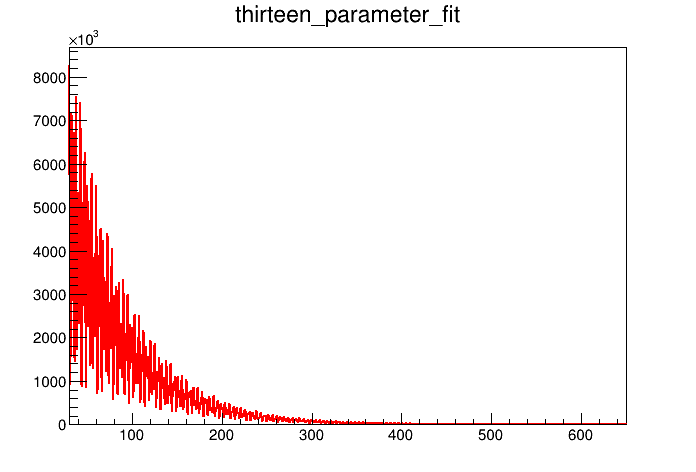

In [26]:
c = r.TCanvas()
fitter13.f.Draw()
c.Draw()

In [27]:
fitter13.Fit(2)

Starting fit 1 / 2
Parameters from this fit: 
     ChiSq/NDF =  6121.3714985405795 / 4143 = 1.4775214816655997
      N  =  7745498.263332193 +/- 301.93501244762126
      #tau  =  64.42122889691245 +/- 0.0014140743405315387
      A  =  0.3703384221881353 +/- 2.929816203693023e-05
      R  =  -45.570248702190774 +/- 0.884572878104108
      #phi  =  -1.0611394670047862 +/- 0.00014557874245162527
      A_{1}  =  -0.004136291754266453 +/- 0.00010294130892091325
      A_{2}  =  0.001039309086757911 +/- 0.0001799277059538012
      A_{3}  =  -0.0013318810899569935 +/- 0.0001872697454738315
      #tau_{CBO}  =  168.44056194729293 +/- 9.349716010048047
      #omega_{CBO}  =  2.5998642122585713 +/- 0.00034914716213394766
      #phi_{CBO - 1}  =  -0.6570535989582397 +/- 0.02630231812752522
      #phi_{CBO - 2}  =  7.288744033732138 +/- 0.17136559123302378
      #phi_{CBO - 3}  =  -9.783927862208083 +/- 0.13930136780276178
Starting fit 2 / 2
Parameters from this fit: 
     ChiSq/NDF =  6121.3714983

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


In [28]:
fitter13.ComputeFFT()

Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


In [29]:
DumpClass(fitter13)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f23b4117550>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("13par") at 0x7fffcedb23f0>
    f = <ROOT.TF1 object ("13par_fitter") at 0x7fffcec5f780>
    name = 13par_fitter
    nPar = 13
    fitOptions = REMB
    nFit = 2
    fitLow = 30
    fitHigh = 650
    intermediateParameters = [[7745498.263332193, 64.42122889691245, 0.3703384221881353, -45.570248702190774, -1.0611394670047862, -0.004136291754266453, 0.001039309086757911, -0.0013318810899569935, 168.44056194729293, 2.5998642122585713, -0.6570535989582397, 7.288744033732138, -9.783927862208083], [7745498.276370859, 64.42122892017417, 0.3703384245750165, -45.57024906943018, -1.0611394677338837, -0.004136299010260251, 0.0010393029442355033, -0.0013318847395196332, 168.44115910268528, 2.5998642138203123, -0.6570541654317005, 7.28870714688371, -9.78392400839576]]
    intermediateErrors = [[301.93501244762126, 0.0014140743405315387, 2.929816203693023e-05, 0

<ROOT.TCanvas object ("c") at 0x7fffcedb35d0>

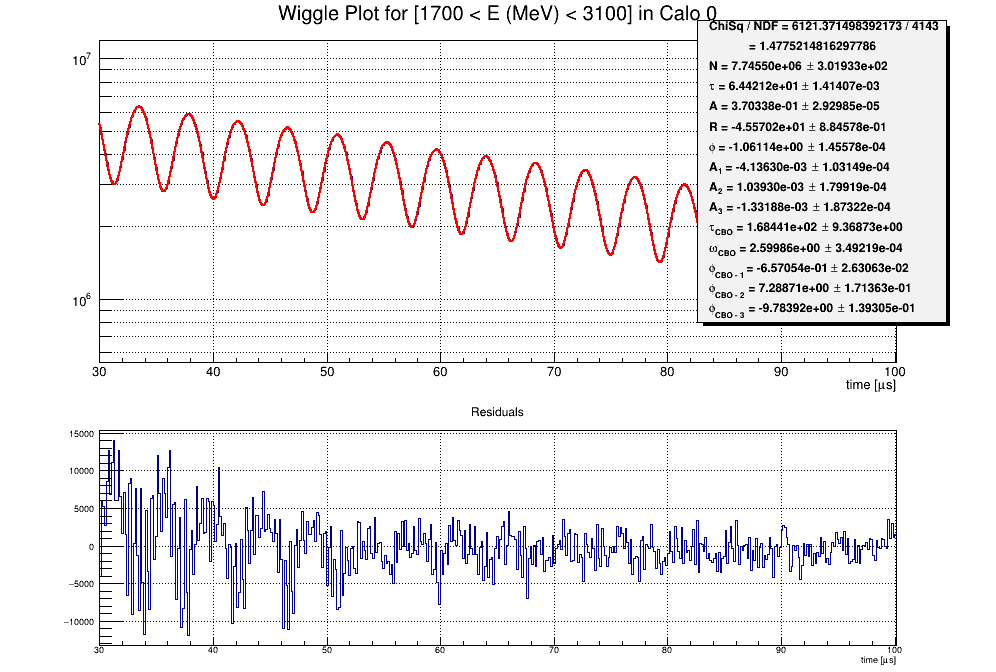

In [30]:
fitter13.Draw(30,100)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


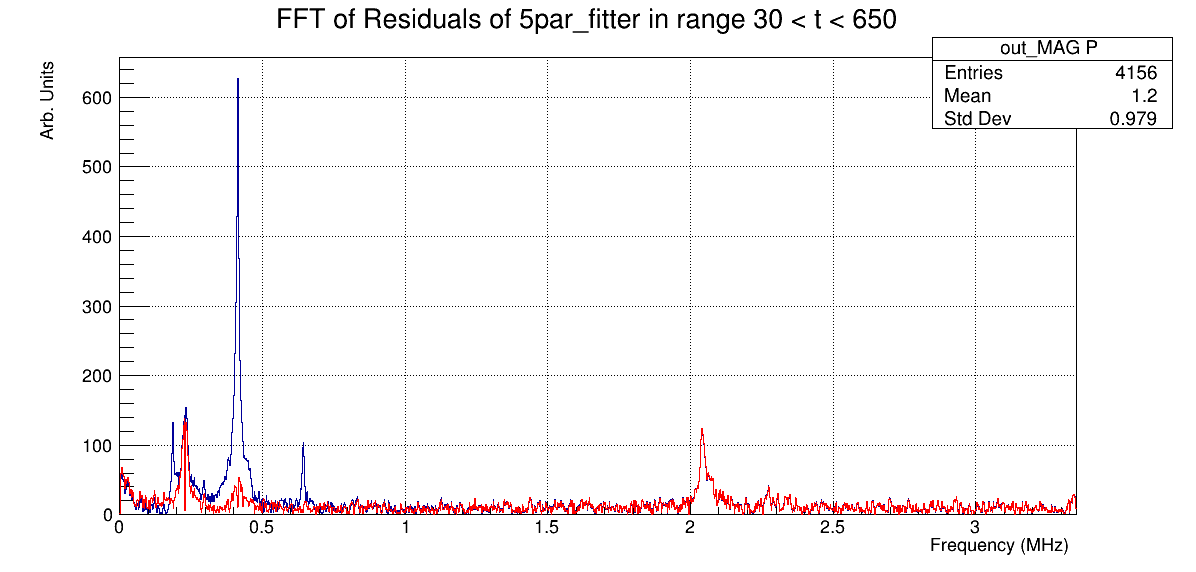

In [31]:
c = r.TCanvas("c","c",1200,600)
fitter.fft.Draw("hist")
fitter13.fft.Draw("hist SAME")
fitter13.fft.SetLineColor(2)
c.SetGrid()
c.Draw()

---

# 17-parameter fit

In [32]:
fitFunc17 = WiggleFit(GetBlindingPhrase("./blinding.txt"), "17par")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [33]:
DumpClass(fitFunc17)

Dumping:  <omega_a_fitting.WiggleFit object at 0x7f23b43f8a90>
Class:  <class 'omega_a_fitting.WiggleFit'>
    getBlinded = <BlindersPy3.Blinders object at 0x7f23b43f8a58>
    KlossHist = None
    funcDict = {'5par': <bound method WiggleFit.five_parameter of <omega_a_fitting.WiggleFit object at 0x7f23b43f8a90>>, '13par': <bound method WiggleFit.blinded_wiggle_cbo of <omega_a_fitting.WiggleFit object at 0x7f23b43f8a90>>, '13par_changing': <bound method WiggleFit.blinded_wiggle_changing_cbo of <omega_a_fitting.WiggleFit object at 0x7f23b43f8a90>>, '17par': <bound method WiggleFit.blinded_wiggle_cbo_vw of <omega_a_fitting.WiggleFit object at 0x7f23b43f8a90>>, '18par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss of <omega_a_fitting.WiggleFit object at 0x7f23b43f8a90>>, '23par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss_changingCBO of <omega_a_fitting.WiggleFit object at 0x7f23b43f8a90>>, 'custom': <bound method WiggleFit.defineCustomFunction of <omega_a_fitting.WiggleFit 

In [34]:
fit17 = BuildTF1(fitFunc17, 17, "17par", "seventeen_parameter_fit", 30, 650)
fit17.SetParameters([100000.0, 64.32689658986958, -0.41149191856871803, -11.31981267111425, -4.201648334505292, 
                     -0.666502391530784, 0.6927259503578, -0.38908021438317, 200.0, 2.5, 0.4745581246420292, 6.299934663288357, 
                     0.28579778778899545, 0.2, 30.0, 12.83, 0.0])
fit17.SetParLimits(14,1,10000)
fit17.ImportParameters(fitter13.f)
fit17.SetParNames()

In [35]:
fitter17 = WiggleFitter(wiggle.h, fit17, "17par", "REMB", 1)

In [36]:
fitter17.PrintParameters()

Parameters from this fit: 
      N  =  7745498.276370859 +/- 0.0
      #tau  =  64.42122892017417 +/- 0.0
      A  =  0.3703384245750165 +/- 0.0
      R  =  -45.57024906943018 +/- 0.0
      #phi  =  -1.0611394677338837 +/- 0.0
      A_{1}  =  -0.004136299010260251 +/- 0.0
      A_{2}  =  0.0010393029442355033 +/- 0.0
      A_{3}  =  -0.0013318847395196332 +/- 0.0
      #tau_{CBO}  =  168.44115910268528 +/- 0.0
      #omega_{CBO}  =  2.5998642138203123 +/- 0.0
      #phi_{CBO - 1}  =  -0.6570541654317005 +/- 0.0
      #phi_{CBO - 2}  =  7.28870714688371 +/- 0.0
      #phi_{CBO - 3}  =  -9.78392400839576 +/- 0.0
      A_{VW}  =  0.2 +/- 0.0
      #tau_{VW}  =  30.0 +/- 0.0
      #omega_{VW}  =  12.83 +/- 0.0
      #phi_{VW}  =  0.0 +/- 0.0


In [37]:
DumpClass(fitter17)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f23b441b470>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("17par") at 0x7fffce3b7db0>
    f = <ROOT.TF1 object ("17par_fitter") at 0x7fffceddacc0>
    name = 17par_fitter
    nPar = 17
    fitOptions = REMB
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = []
    intermediateErrors = []
    intermediateChi2 = []
    pt = <ROOT.TPaveText object ("TPave") at 0x7fffceeb45a0>
    resid = None
    fft = None


In [38]:
fitter17.Fit(2)

Starting fit 1 / 1
Parameters from this fit: 
     ChiSq/NDF =  5654.950916061673 / 4139 = 1.3662601874998002
      N  =  7745496.212237459 +/- 301.95141156258245
      #tau  =  64.42123691524736 +/- 0.0014141146842283558
      A  =  0.37033846824766037 +/- 2.9298431594289932e-05
      R  =  -45.59207450320134 +/- 0.8846084907581276
      #phi  =  -1.0611344085570462 +/- 0.0001455900775370299
      A_{1}  =  -0.004141203606545246 +/- 0.00010309828029420334
      A_{2}  =  0.001042469457891675 +/- 0.0001800828127470757
      A_{3}  =  -0.001322895854413778 +/- 0.00018734216935888793
      #tau_{CBO}  =  168.11767233476868 +/- 9.32257367043892
      #omega_{CBO}  =  2.599855255251069 +/- 0.0003492490065764814
      #phi_{CBO - 1}  =  -0.6562442072588816 +/- 0.02629853059809238
      #phi_{CBO - 2}  =  7.2908489523297515 +/- 0.17097894803108715
      #phi_{CBO - 3}  =  -9.785830847743895 +/- 0.14035781794248994
      A_{VW}  =  0.004115469111945793 +/- 0.0007092949751849146
      #tau_{VW

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


In [39]:
DumpClass(fitter17)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f23b441b470>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("17par") at 0x7fffce3b7db0>
    f = <ROOT.TF1 object ("17par_fitter") at 0x7fffceddacc0>
    name = 17par_fitter
    nPar = 17
    fitOptions = REMB
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = [[7745496.212237459, 64.42123691524736, 0.37033846824766037, -45.59207450320134, -1.0611344085570462, -0.004141203606545246, 0.001042469457891675, -0.001322895854413778, 168.11767233476868, 2.599855255251069, -0.6562442072588816, 7.2908489523297515, -9.785830847743895, 0.004115469111945793, 30.516544404087824, 12.83036115920243, -7.586471454505024]]
    intermediateErrors = [[301.95141156258245, 0.0014141146842283558, 2.9298431594289932e-05, 0.8846084907581276, 0.0001455900775370299, 0.00010309828029420334, 0.0001800828127470757, 0.00018734216935888793, 9.32257367043892, 0.0003492490065764814, 0.02629853059809238, 0.17097894803

<ROOT.TCanvas object ("c") at 0x7fffcee4fda0>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


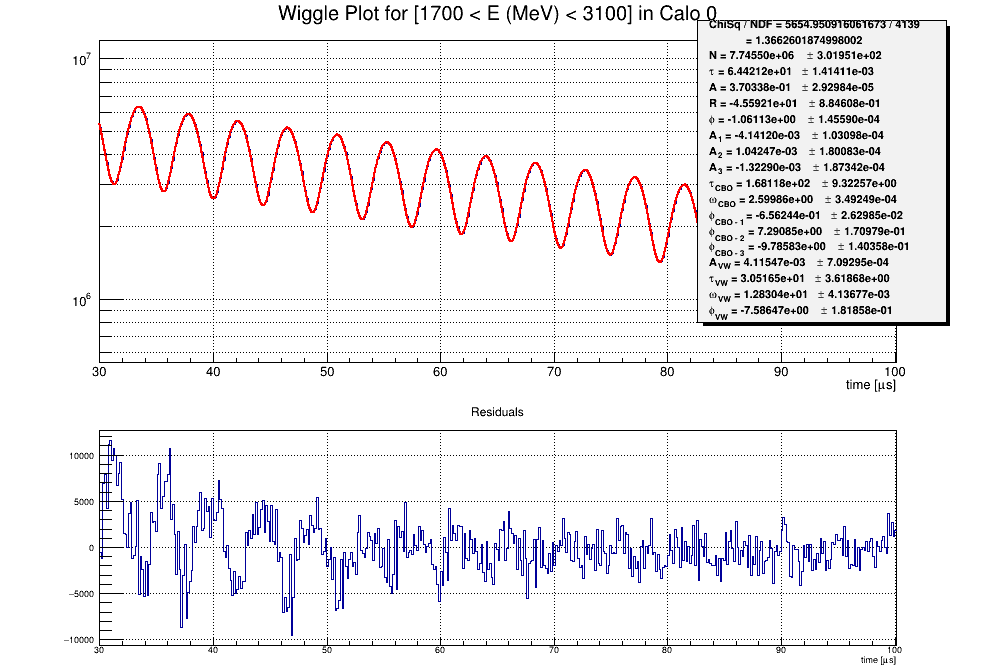

In [40]:
fitter17.Draw(30,100)

In [41]:
fitter17.ComputeFFT()

Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


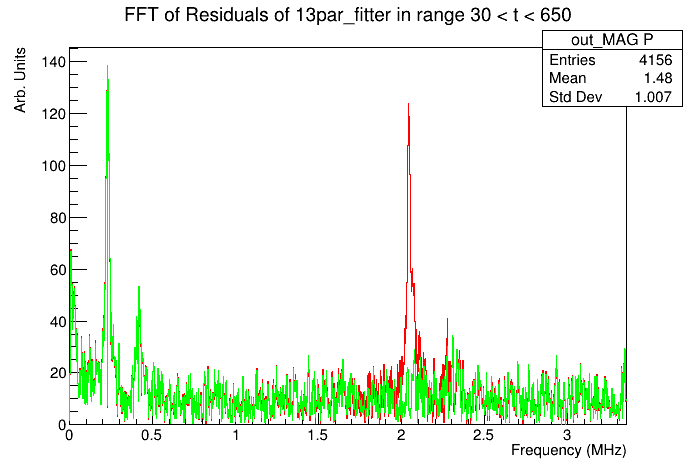

In [42]:
c = r.TCanvas()
#fitter.fft.Draw("hist")
fitter13.fft.Draw("hist ")
fitter17.fft.Draw("hist SAME")
fitter17.fft.SetLineColor(3)
c.Draw()

In [43]:
print([fitter17.f.GetParameter(i) for i in range(17)])

[7745496.212237459, 64.42123691524736, 0.37033846824766037, -45.59207450320134, -1.0611344085570462, -0.004141203606545246, 0.001042469457891675, -0.001322895854413778, 168.11767233476868, 2.599855255251069, -0.6562442072588816, 7.2908489523297515, -9.785830847743895, 0.004115469111945793, 30.516544404087824, 12.83036115920243, -7.586471454505024]


---

### And now 18-parameters, initializing the lost muon function first

In [44]:
triples = f.Get("clustersAndCoincidences").Get("triples")
triples_b = f.Get("clustersAndCoincidences").Get("backwardsTriples")
print(triples)

<ROOT.TH2I object ("triples") at 0x7fffc995e210>


In [45]:
lifetimeFirstGuess = 64.42166948521992

In [46]:
lm = MuonLoss(triples, triples_b, lifetimeFirstGuess, 0, False, calo)

In [47]:
DumpClass(lm)

Dumping:  <lost_muon_calculation.MuonLoss object at 0x7f23b40d6cc0>
Class:  <class 'lost_muon_calculation.MuonLoss'>
    triples = <ROOT.TH1D object ("triples") at 0x7fffcef5d9d0>
    backwardsTriples = <ROOT.TH1D object ("b_triples") at 0x7fffcee50440>
    tau = 64.42166948521992
    subtractBackwards = False
    caloNum = 0
    muonLossHist = <ROOT.TH1D object ("muonLossHist") at 0x7fffcef37e50>
    iteration = 0


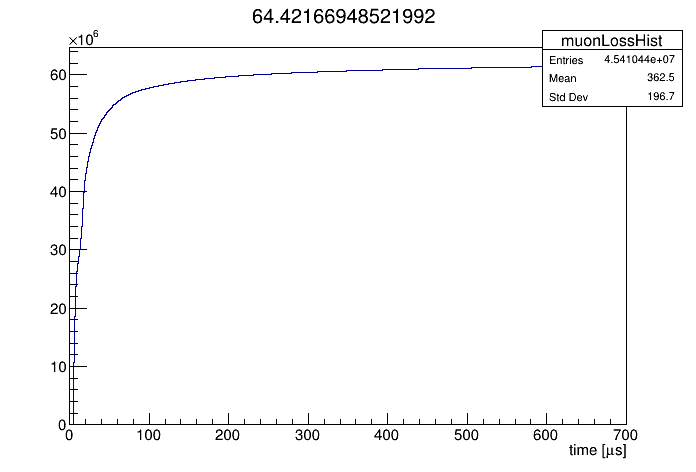

In [48]:
c = r.TCanvas()
lm.muonLossHist.Draw()
c.Draw()

In [49]:
fitFunc18 = WiggleFit(GetBlindingPhrase("./blinding.txt"), "18par")
fitFunc18.initializeKloss( lm.muonLossHist )

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [50]:
DumpClass(fitFunc18)

Dumping:  <omega_a_fitting.WiggleFit object at 0x7f23b43fee48>
Class:  <class 'omega_a_fitting.WiggleFit'>
    getBlinded = <BlindersPy3.Blinders object at 0x7f23b43fee10>
    KlossHist = <ROOT.TH1D object ("KlossHist") at 0x7fffcf09cb40>
    funcDict = {'5par': <bound method WiggleFit.five_parameter of <omega_a_fitting.WiggleFit object at 0x7f23b43fee48>>, '13par': <bound method WiggleFit.blinded_wiggle_cbo of <omega_a_fitting.WiggleFit object at 0x7f23b43fee48>>, '13par_changing': <bound method WiggleFit.blinded_wiggle_changing_cbo of <omega_a_fitting.WiggleFit object at 0x7f23b43fee48>>, '17par': <bound method WiggleFit.blinded_wiggle_cbo_vw of <omega_a_fitting.WiggleFit object at 0x7f23b43fee48>>, '18par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss of <omega_a_fitting.WiggleFit object at 0x7f23b43fee48>>, '23par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss_changingCBO of <omega_a_fitting.WiggleFit object at 0x7f23b43fee48>>, 'custom': <bound method WiggleFit.defin

In [51]:
fit18 = BuildTF1(fitFunc18, 18, "18par", "eighteen_parameter_fit", 30, 650)
#fit18.SetParameters(pars17)
fit18.SetParLimits(8,1,10000)
fit18.SetParLimits(14,1,10000)
fit18.f.SetParameter(17, (10**(-12)) )
fit18.ImportParameters(fitter17.f)
fit18.SetParNames()

In [52]:
DumpClass(fit18)

Dumping:  <omega_a_fitting.BuildTF1 object at 0x7f23b43fc630>
Class:  <class 'omega_a_fitting.BuildTF1'>
    f = <ROOT.TF1 object ("eighteen_parameter_fit") at 0x7fffcf0b3460>
    nPar = 18
    name = eighteen_parameter_fit
    fitLow = 30
    fitHigh = 650
    funcRaw = <omega_a_fitting.WiggleFit object at 0x7f23b43fee48>
    kind = 18par
    nameDict = {'5par': ['N', '#tau_{#mu}', 'A', 'R', '#phi_{a}'], '13par': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}'], '13par_changing': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}', '#delta#omega_{CBO}', 'A_{CBO}', '#tau_{CBO - A}', 'B_{CBO}', '#tau_{CBO - B}'], '17par': ['N', '#tau', 'A', 'R', '#phi', 'A_{1}', 'A_{2}', 'A_{3}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - 1}', '#phi_{CBO - 2}', '#phi_{CBO - 3}', 'A_{VW}', '#tau_{VW}', '#omega_{VW}', '#phi_

In [53]:
fitter18 = WiggleFitter(wiggle.h, fit18, "18par", "REMB", 1)

In [54]:
fitter18.PrintParameters()

Parameters from this fit: 
      N  =  7745496.212237459 +/- 0.0
      #tau  =  64.42123691524736 +/- 0.0
      A  =  0.37033846824766037 +/- 0.0
      R  =  -45.59207450320134 +/- 0.0
      #phi  =  -1.0611344085570462 +/- 0.0
      A_{1}  =  -0.004141203606545246 +/- 0.0
      A_{2}  =  0.001042469457891675 +/- 0.0
      A_{3}  =  -0.001322895854413778 +/- 0.0
      #tau_{CBO}  =  168.11767233476868 +/- 0.0
      #omega_{CBO}  =  2.599855255251069 +/- 0.0
      #phi_{CBO - 1}  =  -0.6562442072588816 +/- 0.0
      #phi_{CBO - 2}  =  7.2908489523297515 +/- 0.0
      #phi_{CBO - 3}  =  -9.785830847743895 +/- 0.0
      A_{VW}  =  0.004115469111945793 +/- 0.0
      #tau_{VW}  =  30.516544404087824 +/- 0.0
      #omega_{VW}  =  12.83036115920243 +/- 0.0
      #phi_{VW}  =  -7.586471454505024 +/- 0.0
      K_{loss}  =  1e-12 +/- 0.0


In [55]:
DumpClass(fitter18)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f23b43fc0b8>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("18par") at 0x7fffcf0a0d10>
    f = <ROOT.TF1 object ("18par_fitter") at 0x7fffcea6c020>
    name = 18par_fitter
    nPar = 18
    fitOptions = REMB
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = []
    intermediateErrors = []
    intermediateChi2 = []
    pt = <ROOT.TPaveText object ("TPave") at 0x7fffcf0c8ef0>
    resid = None
    fft = None


In [56]:
fitter18.Fit(2)

Starting fit 1 / 1
Parameters from this fit: 
     ChiSq/NDF =  5502.468702639248 / 4138 = 1.329741107452694
      N  =  7807241.916400189 +/- 5007.544428681252
      #tau  =  64.44486339042159 +/- 0.002379802576203786
      A  =  0.3703512522017634 +/- 2.931709537432296e-05
      R  =  -45.80574481501057 +/- 0.8844094807590547
      #phi  =  -1.061085914373898 +/- 0.00014559808945897914
      A_{1}  =  -0.004185366124867492 +/- 0.00010446483402163535
      A_{2}  =  0.001006109449412163 +/- 0.0001810169580717319
      A_{3}  =  -0.0012411749467490527 +/- 0.0001880539544364849
      #tau_{CBO}  =  165.50373809984566 +/- 9.099196808271444
      #omega_{CBO}  =  2.599831463032039 +/- 0.0003487792067096856
      #phi_{CBO - 1}  =  -0.655027052901204 +/- 0.026150390285563926
      #phi_{CBO - 2}  =  7.35337989201128 +/- 0.17830674845980077
      #phi_{CBO - 3}  =  -9.711270701279457 +/- 0.15053471979745622
      A_{VW}  =  0.004131238552497387 +/- 0.0007151841980973983
      #tau_{VW}  =  

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


In [57]:
DumpClass(fitter18)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f23b43fc0b8>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("18par") at 0x7fffcf0a0d10>
    f = <ROOT.TF1 object ("18par_fitter") at 0x7fffcea6c020>
    name = 18par_fitter
    nPar = 18
    fitOptions = REMB
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = [[7807241.916400189, 64.44486339042159, 0.3703512522017634, -45.80574481501057, -1.061085914373898, -0.004185366124867492, 0.001006109449412163, -0.0012411749467490527, 165.50373809984566, 2.599831463032039, -0.655027052901204, 7.35337989201128, -9.711270701279457, 0.004131238552497387, 30.409343478372744, 12.831105637047148, -7.625787567732796, 1.509490310285297e-10]]
    intermediateErrors = [[5007.544428681252, 0.002379802576203786, 2.931709537432296e-05, 0.8844094807590547, 0.00014559808945897914, 0.00010446483402163535, 0.0001810169580717319, 0.0001880539544364849, 9.099196808271444, 0.0003487792067096856, 0.02615039028556

<ROOT.TCanvas object ("c") at 0x7fffcf0fcad0>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


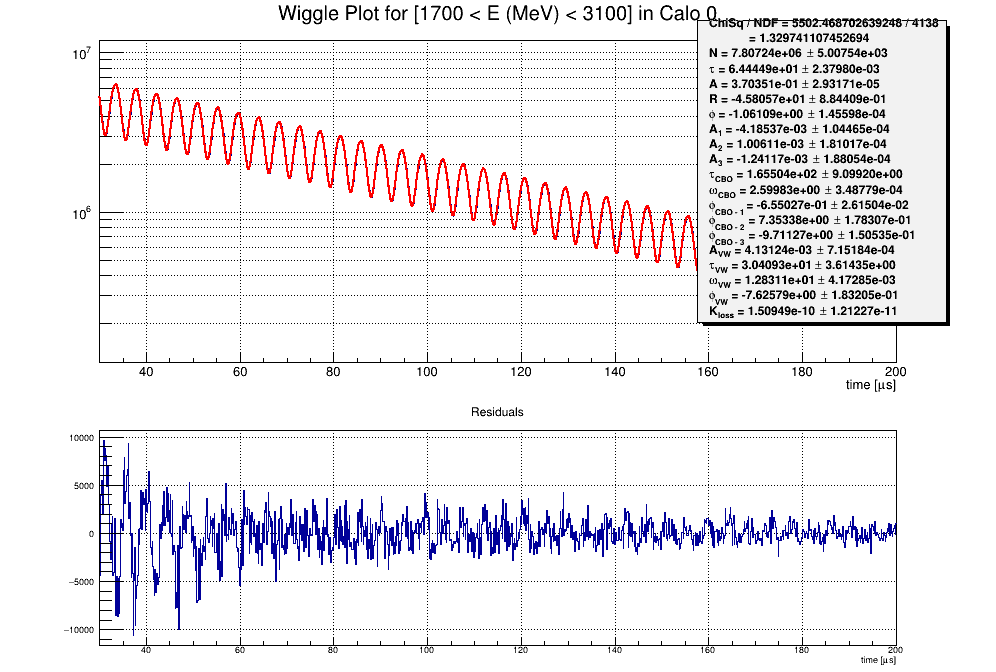

In [58]:
fitter18.Draw(30,200)

In [59]:
fitter18.ComputeFFT()

Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


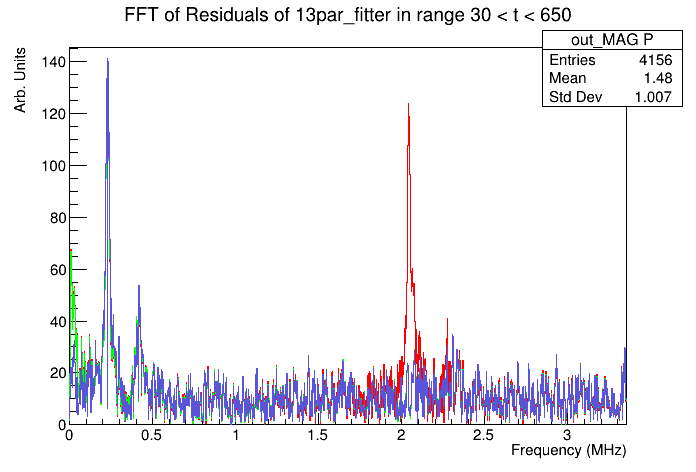

In [60]:
c = r.TCanvas()
#fitter.fft.Draw("hist")
fitter13.fft.Draw("hist ")
fitter17.fft.Draw("hist SAME")
fitter17.fft.SetLineColor(3)
fitter18.fft.Draw("hist SAME")
fitter18.fft.SetLineColor(9)
c.Draw()

---

### And now the 23-parameter fit with changing CBO frequency

In [61]:
fitFunc23 = WiggleFit(GetBlindingPhrase("./blinding.txt"), "23par")
fitFunc23.initializeKloss( lm.muonLossHist )
fitFunc23.cboFrequencyModel = "tracker"

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [62]:
fit23 = BuildTF1(fitFunc23, 23, "23par", "twentythree_parameter_fit", 30, 650)
fit23.SetParLimits(8,1,10000)
fit23.SetParLimits(14,1,10000)
fit23.SetParLimits(20,1,10000)
fit23.SetParLimits(22,1,10000)
fit23.f.SetParameter(18, 1.8 )
fit23.f.SetParameter(19, -5.22 )
fit23.f.SetParameter(20, 50 )
fit23.f.SetParameter(21, -13.05 )
fit23.f.SetParameter(22, 10 )
fit23.ImportParameters(fitter18.f)
for i in range(18):
    if(i != 9):
        fit23.f.FixParameter(i, fitter18.f.GetParameter(i))
fit23.SetParNames()

In [63]:
fitter23 = WiggleFitter(wiggle.h, fit23, "23par", "REMB", 2)

In [64]:
fitter23.PrintParameters()

Parameters from this fit: 
      N  =  7807241.916400189 +/- 0.0
      #tau  =  64.44486339042159 +/- 0.0
      A  =  0.3703512522017634 +/- 0.0
      R  =  -45.80574481501057 +/- 0.0
      #phi  =  -1.061085914373898 +/- 0.0
      A_{1}  =  -0.004185366124867492 +/- 0.0
      A_{2}  =  0.001006109449412163 +/- 0.0
      A_{3}  =  -0.0012411749467490527 +/- 0.0
      #tau_{CBO}  =  165.50373809984566 +/- 0.0
      #omega_{CBO}  =  2.599831463032039 +/- 0.0
      #phi_{CBO - 1}  =  -0.655027052901204 +/- 0.0
      #phi_{CBO - 2}  =  7.35337989201128 +/- 0.0
      #phi_{CBO - 3}  =  -9.711270701279457 +/- 0.0
      A_{VW}  =  0.004131238552497387 +/- 0.0
      #tau_{VW}  =  30.409343478372744 +/- 0.0
      #omega_{VW}  =  12.831105637047148 +/- 0.0
      #phi_{VW}  =  -7.625787567732796 +/- 0.0
      K_{loss}  =  1.509490310285297e-10 +/- 0.0
      #delta#omega_{CBO}  =  1.8 +/- 0.0
      A_{CBO}  =  -5.22 +/- 0.0
      #tau_{CBO - A}  =  50.0 +/- 0.0
      B_{CBO}  =  -13.05 +/- 0.0
   

In [65]:
DumpClass(fitter23)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f23b43fcbe0>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("23par") at 0x7fffcf18f730>
    f = <ROOT.TF1 object ("23par_fitter") at 0x7fffcf1989a0>
    name = 23par_fitter
    nPar = 23
    fitOptions = REMB
    nFit = 2
    fitLow = 30
    fitHigh = 650
    intermediateParameters = []
    intermediateErrors = []
    intermediateChi2 = []
    pt = <ROOT.TPaveText object ("TPave") at 0x7fffcf15b630>
    resid = None
    fft = None


In [66]:
fitter23.Fit(2)

Starting fit 1 / 2
Parameters from this fit: 
     ChiSq/NDF =  5333.016774209575 / 4150 = 1.2850642829420662
      N  =  7807241.916400189 +/- 0.0
      #tau  =  64.44486339042159 +/- 0.0
      A  =  0.3703512522017634 +/- 0.0
      R  =  -45.80574481501057 +/- 0.0
      #phi  =  -1.061085914373898 +/- 0.0
      A_{1}  =  -0.004185366124867492 +/- 0.0
      A_{2}  =  0.001006109449412163 +/- 0.0
      A_{3}  =  -0.0012411749467490527 +/- 0.0
      #tau_{CBO}  =  165.50373809984566 +/- 0.0
      #omega_{CBO}  =  2.7403581563260837 +/- 0.23940335197037968
      #phi_{CBO - 1}  =  -0.655027052901204 +/- 0.0
      #phi_{CBO - 2}  =  7.35337989201128 +/- 0.0
      #phi_{CBO - 3}  =  -9.711270701279457 +/- 0.0
      A_{VW}  =  0.004131238552497387 +/- 0.0
      #tau_{VW}  =  30.409343478372744 +/- 0.0
      #omega_{VW}  =  12.831105637047148 +/- 0.0
      #phi_{VW}  =  -7.625787567732796 +/- 0.0
      K_{loss}  =  1.509490310285297e-10 +/- 0.0
      #delta#omega_{CBO}  =  -3.958781487489410

Warning in <Fit>: Abnormal termination of minimization.
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


In [67]:
for i in range(23):
    fitter23.f.ReleaseParameter(i)
fitter23.f.SetParLimits(8,100,10000)
fitter23.f.SetParLimits(14,1,10000)
fitter23.f.SetParLimits(20,1,10000)
fitter23.f.SetParLimits(22,1,10000)

In [68]:
fitter23.nFit = 1
fitter23.Fit(2)

Starting fit 1 / 1
Parameters from this fit: 
     ChiSq/NDF =  5323.8667150430765 / 4133 = 1.2881361517162053
      N  =  7806846.6904032845 +/- 1549.5458228753553
      #tau  =  64.44476386972117 +/- 0.0015503473344930466
      A  =  0.3703524472125322 +/- 2.9209265803518706e-05
      R  =  -46.05265917918268 +/- 0.8725601154578075
      #phi  =  -1.0610289801229167 +/- 0.00014366635817337952
      A_{1}  =  -0.003996266961501906 +/- 9.550982003326656e-05
      A_{2}  =  0.0008680174673367003 +/- 0.00017032609777167416
      A_{3}  =  -0.0011416438075874172 +/- 0.00017671104400953966
      #tau_{CBO}  =  192.8497521685561 +/- 11.386337194362099
      #omega_{CBO}  =  2.7410988622761296 +/- 0.0017473780554010424
      #phi_{CBO - 1}  =  -0.758314134149701 +/- 0.12329658845029398
      #phi_{CBO - 2}  =  7.103164103892917 +/- 0.2284478949488768
      #phi_{CBO - 3}  =  -9.876140193828691 +/- 0.1955019061514945
      A_{VW}  =  0.004107668626722005 +/- 0.0006593907723152533
      #tau_{

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


In [69]:
fitter23.PrintParameters()

Parameters from this fit: 
     ChiSq/NDF =  5323.8667150430765 / 4133 = 1.2881361517162053
      N  =  7806846.6904032845 +/- 1549.5458228753553
      #tau  =  64.44476386972117 +/- 0.0015503473344930466
      A  =  0.3703524472125322 +/- 2.9209265803518706e-05
      R  =  -46.05265917918268 +/- 0.8725601154578075
      #phi  =  -1.0610289801229167 +/- 0.00014366635817337952
      A_{1}  =  -0.003996266961501906 +/- 9.550982003326656e-05
      A_{2}  =  0.0008680174673367003 +/- 0.00017032609777167416
      A_{3}  =  -0.0011416438075874172 +/- 0.00017671104400953966
      #tau_{CBO}  =  192.8497521685561 +/- 11.386337194362099
      #omega_{CBO}  =  2.7410988622761296 +/- 0.0017473780554010424
      #phi_{CBO - 1}  =  -0.758314134149701 +/- 0.12329658845029398
      #phi_{CBO - 2}  =  7.103164103892917 +/- 0.2284478949488768
      #phi_{CBO - 3}  =  -9.876140193828691 +/- 0.1955019061514945
      A_{VW}  =  0.004107668626722005 +/- 0.0006593907723152533
      #tau_{VW}  =  30.54307189

In [70]:
DumpClass(fitter23)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7f23b43fcbe0>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("23par") at 0x7fffcf18f730>
    f = <ROOT.TF1 object ("23par_fitter") at 0x7fffcf1989a0>
    name = 23par_fitter
    nPar = 23
    fitOptions = REMB
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = [[7807241.916400189, 64.44486339042159, 0.3703512522017634, -45.80574481501057, -1.061085914373898, -0.004185366124867492, 0.001006109449412163, -0.0012411749467490527, 165.50373809984566, 2.7403581563260837, -0.655027052901204, 7.35337989201128, -9.711270701279457, 0.004131238552497387, 30.409343478372744, 12.831105637047148, -7.625787567732796, 1.509490310285297e-10, -3.9587814874894103, -5.425919236192816, 822.7817325284433, 1.963513978544519, 20.557488342265536], [7807241.916400189, 64.44486339042159, 0.3703512522017634, -45.80574481501057, -1.061085914373898, -0.004185366124867492, 0.001006109449412163, -0.0012411749467490

<ROOT.TCanvas object ("c") at 0x7fffcf11cb50>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


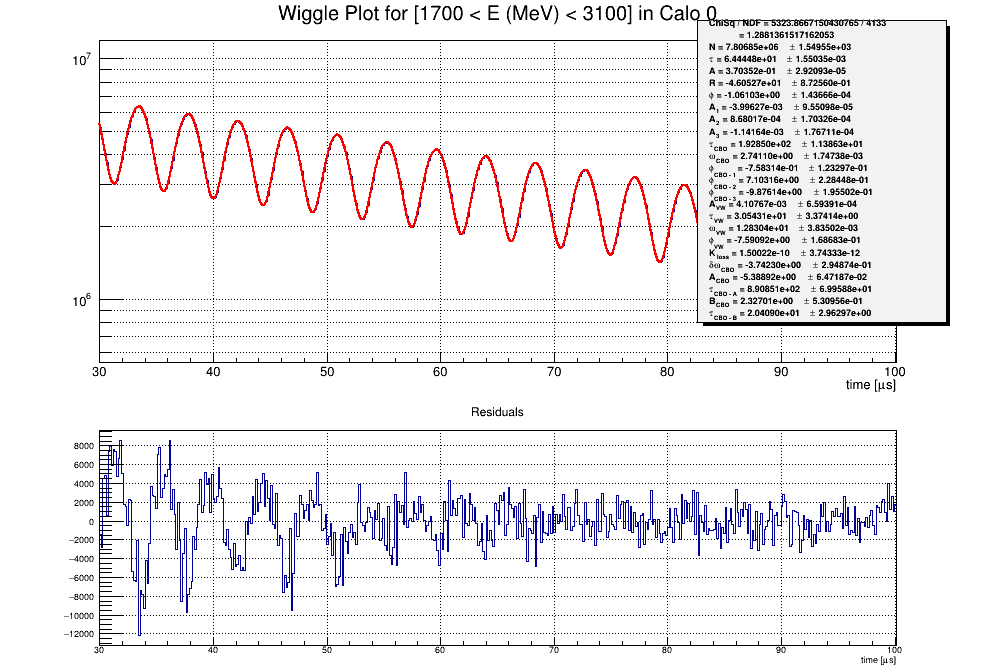

In [71]:
fitter23.Draw(30,100)

In [72]:
fitter23.ComputeFFT()

Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


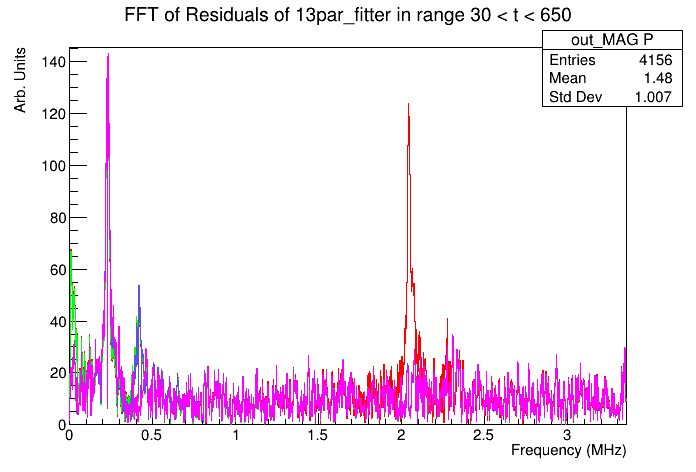

In [73]:
c = r.TCanvas()
#fitter.fft.Draw("hist")
fitter13.fft.Draw("hist ")
fitter17.fft.Draw("hist SAME")
fitter17.fft.SetLineColor(3)
fitter18.fft.Draw("hist SAME")
fitter18.fft.SetLineColor(9)
fitter23.fft.Draw("hist SAME")
fitter23.fft.SetLineColor(6)
c.Draw()

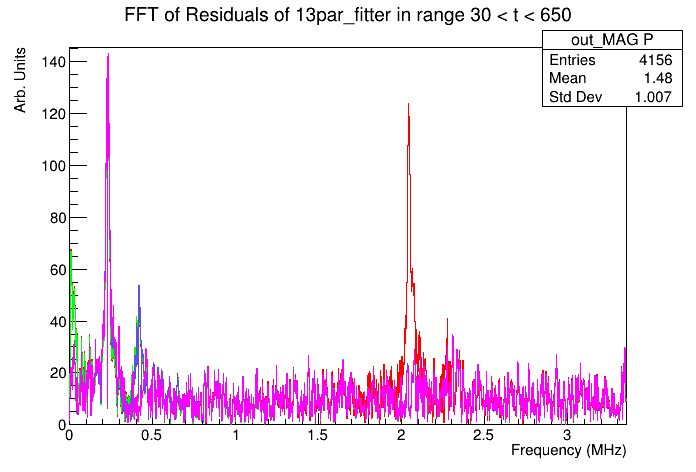

In [74]:
c = r.TCanvas()
#fitter.fft.Draw("hist")
fitter13.fft.Draw("hist ")
fitter17.fft.Draw("hist SAME")
fitter17.fft.SetLineColor(3)
fitter18.fft.Draw("hist SAME")
fitter18.fft.SetLineColor(9)
fitter23.fft.Draw("hist SAME")
fitter23.fft.SetLineColor(6)
c.Draw()

In [75]:
SaveToRootFile(fitter23, "23ParameterFit")

Saving class <omega_a_fitting.WiggleFitter object at 0x7f23b43fcbe0>  to file  23ParameterFit_2019_07_22_19_20_49.root
